In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')

In [4]:
# Step 2: Load and explore the dataset
df = pd.read_csv('heart.csv')

# Basic dataset information
df.shape

(1025, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Target Distribution:
target
1    526
0    499
Name: count, dtype: int64

Target Distribution (%):
target
1    51.317073
0    48.682927
Name: proportion, dtype: float64

Basic Statistics:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean   

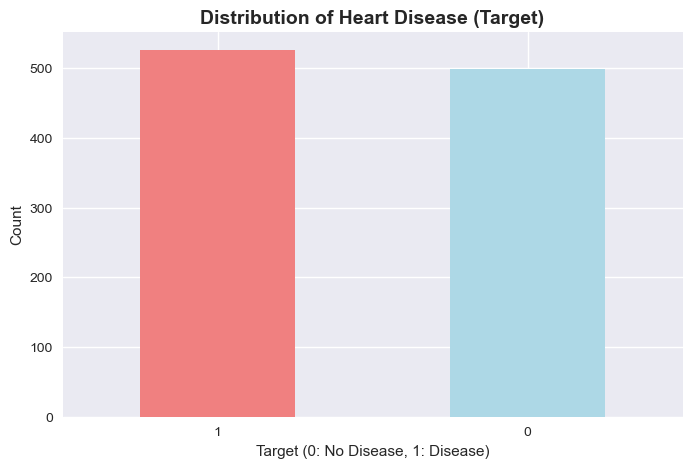

In [7]:
# Step 3: Explore target distribution and basic statistics
print("Target Distribution:")
print(df['target'].value_counts())
print(f"\nTarget Distribution (%):")
print(df['target'].value_counts(normalize=True) * 100)

# Basic statistics
print(f"\nBasic Statistics:")
print(df.describe())

# Visualize target distribution
plt.figure(figsize=(8, 5))
df['target'].value_counts().plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Distribution of Heart Disease (Target)', fontsize=14, fontweight='bold')
plt.xlabel('Target (0: No Disease, 1: Disease)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [8]:
# Step 4: Prepare data for training

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFeature names:")
print(list(X.columns))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Ensures balanced split
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training target distribution: {y_train.value_counts().values}")
print(f"Testing target distribution: {y_test.value_counts().values}")

Features (X) shape: (1025, 13)
Target (y) shape: (1025,)

Feature names:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Training set size: 820 samples
Testing set size: 205 samples
Training target distribution: [421 399]
Testing target distribution: [105 100]


In [9]:
# Step 5: Train initial Decision Tree Classifier

# Create and train a decision tree (without depth restriction first)
dt_initial = DecisionTreeClassifier(random_state=42)
dt_initial.fit(X_train, y_train)

# Make predictions
y_train_pred = dt_initial.predict(X_train)
y_test_pred = dt_initial.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("=== Initial Decision Tree Results ===")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Tree Depth: {dt_initial.get_depth()}")
print(f"Number of Leaves: {dt_initial.get_n_leaves()}")

# Check for overfitting
if train_accuracy - test_accuracy > 0.05:
    print(f"\nPotential Overfitting Detected!")
    print(f"Accuracy Gap: {train_accuracy - test_accuracy:.4f}")
else:
    print(f"\nGood generalization (Gap: {train_accuracy - test_accuracy:.4f})")

=== Initial Decision Tree Results ===
Training Accuracy: 1.0000
Testing Accuracy: 0.9854
Tree Depth: 9
Number of Leaves: 49

Good generalization (Gap: 0.0146)


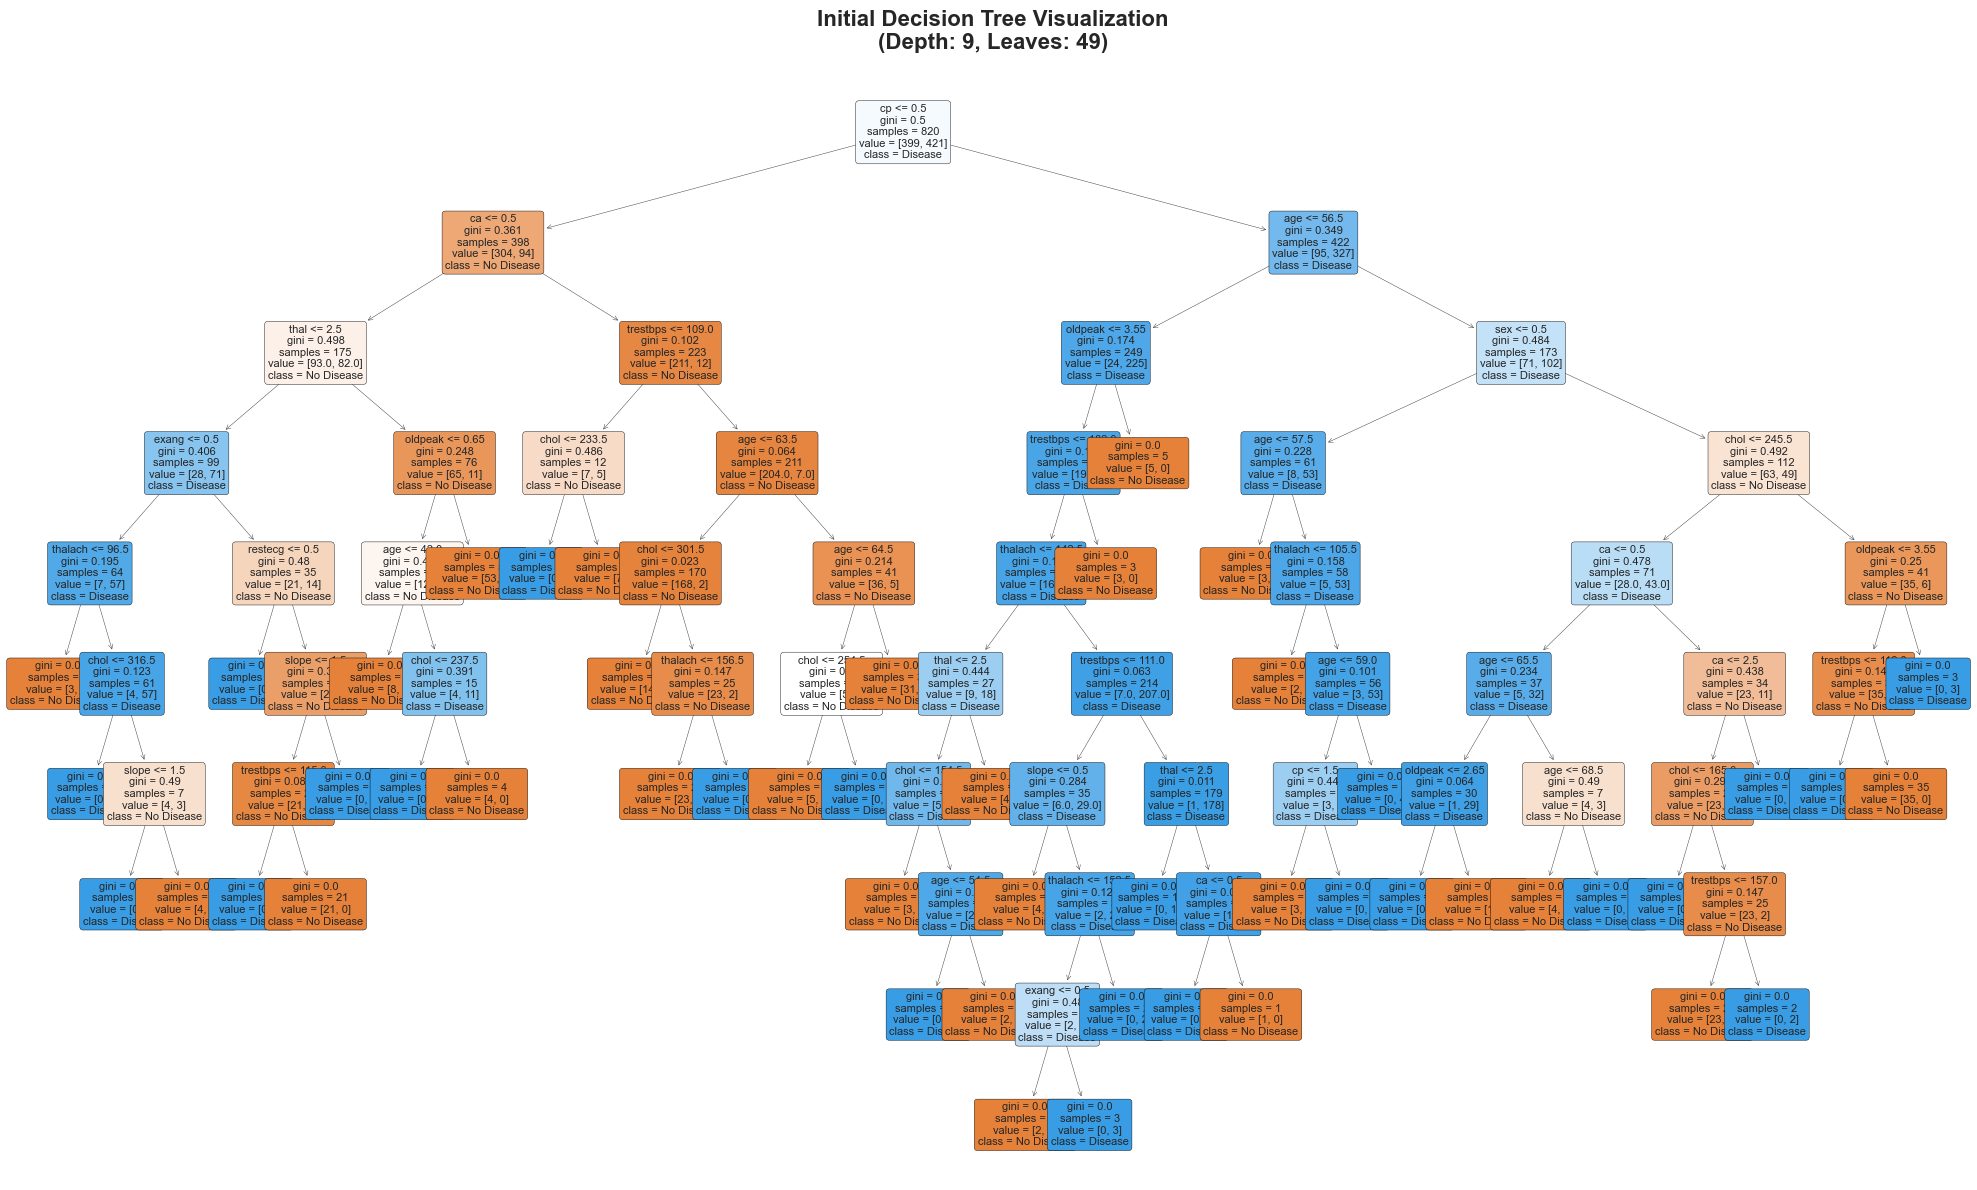

=== Feature Importances (Initial Tree) ===
     feature  importance
2         cp    0.299922
11        ca    0.128631
0        age    0.114920
4       chol    0.099451
12      thal    0.079146
9    oldpeak    0.054481
3   trestbps    0.051820
7    thalach    0.043466
10     slope    0.038558
1        sex    0.035869
8      exang    0.032445
6    restecg    0.021291
5        fbs    0.000000


In [10]:
# Step 6: Visualize the Decision Tree
plt.figure(figsize=(20, 12))

# Plot the decision tree
plot_tree(dt_initial, 
          feature_names=X.columns,
          class_names=['No Disease', 'Disease'],
          filled=True,
          rounded=True,
          fontsize=8)

plt.title('Initial Decision Tree Visualization\n(Depth: 9, Leaves: 49)', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Show feature importances
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_initial.feature_importances_
}).sort_values('importance', ascending=False)

print("=== Feature Importances (Initial Tree) ===")
print(feature_importance)

=== Tree Depth Analysis ===
Depth | Train Acc | Test Acc  | Gap
------|-----------|-----------|--------
   1  |   0.7695  |   0.7220  | +0.0476
   2  |   0.7695  |   0.7220  | +0.0476
   3  |   0.8451  |   0.8537  | -0.0085
   4  |   0.8854  |   0.8390  | +0.0463
   5  |   0.9293  |   0.8732  | +0.0561
   6  |   0.9659  |   0.9220  | +0.0439
   7  |   0.9915  |   0.9512  | +0.0402
   8  |   0.9976  |   0.9756  | +0.0220
   9  |   1.0000  |   0.9854  | +0.0146
  10  |   1.0000  |   0.9854  | +0.0146


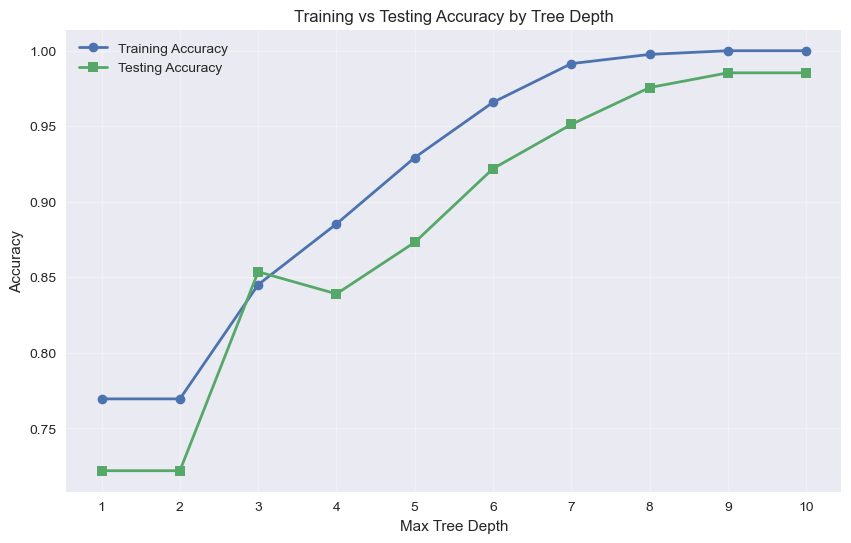

In [11]:
# Step 7: Analyze overfitting with different tree depths
depths = range(1, 11)
train_accuracies = []
test_accuracies = []

print("=== Tree Depth Analysis ===")
print("Depth | Train Acc | Test Acc  | Gap")
print("------|-----------|-----------|--------")

for depth in depths:
    # Train tree with max_depth constraint
    dt_depth = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_depth.fit(X_train, y_train)
    
    # Calculate accuracies
    train_acc = accuracy_score(y_train, dt_depth.predict(X_train))
    test_acc = accuracy_score(y_test, dt_depth.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    gap = train_acc - test_acc
    print(f"  {depth:2d}  |   {train_acc:.4f}  |   {test_acc:.4f}  | {gap:+.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, 'o-', label='Training Accuracy', linewidth=2)
plt.plot(depths, test_accuracies, 's-', label='Testing Accuracy', linewidth=2)
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy by Tree Depth')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(depths)
plt.show()

In [12]:
# Step 8: Train Random Forest Classifier
print("=== Training Random Forest ===")

# Train Random Forest with different n_estimators
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,  # Based on our analysis
    random_state=42,
    n_jobs=-1  # Use all available cores
)

rf.fit(X_train, y_train)

# Make predictions
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

# Calculate accuracies
rf_train_acc = accuracy_score(y_train, rf_train_pred)
rf_test_acc = accuracy_score(y_test, rf_test_pred)

print(f"Random Forest Training Accuracy: {rf_train_acc:.4f}")
print(f"Random Forest Testing Accuracy: {rf_test_acc:.4f}")
print(f"Random Forest Gap: {rf_train_acc - rf_test_acc:.4f}")

print("\n=== Comparison: Decision Tree vs Random Forest ===")
print(f"Single Tree (depth=8): {accuracy_score(y_test, dt_depth.predict(X_test)):.4f}")
print(f"Random Forest:         {rf_test_acc:.4f}")
print(f"Improvement: {rf_test_acc - accuracy_score(y_test, dt_depth.predict(X_test)):.4f}")

=== Training Random Forest ===
Random Forest Training Accuracy: 0.9976
Random Forest Testing Accuracy: 0.9902
Random Forest Gap: 0.0073

=== Comparison: Decision Tree vs Random Forest ===
Single Tree (depth=8): 0.9854
Random Forest:         0.9902
Improvement: 0.0049


=== Feature Importance Comparison ===
     feature  single_tree  random_forest
2         cp       0.3017         0.1525
11        ca       0.1294         0.1182
7    thalach       0.0521         0.1140
9    oldpeak       0.0432         0.1058
12      thal       0.0796         0.1046
0        age       0.1162         0.0877
8      exang       0.0267         0.0787
4       chol       0.1000         0.0698
3   trestbps       0.0431         0.0654
10     slope       0.0504         0.0483
1        sex       0.0361         0.0273
6    restecg       0.0214         0.0178
5        fbs       0.0000         0.0099


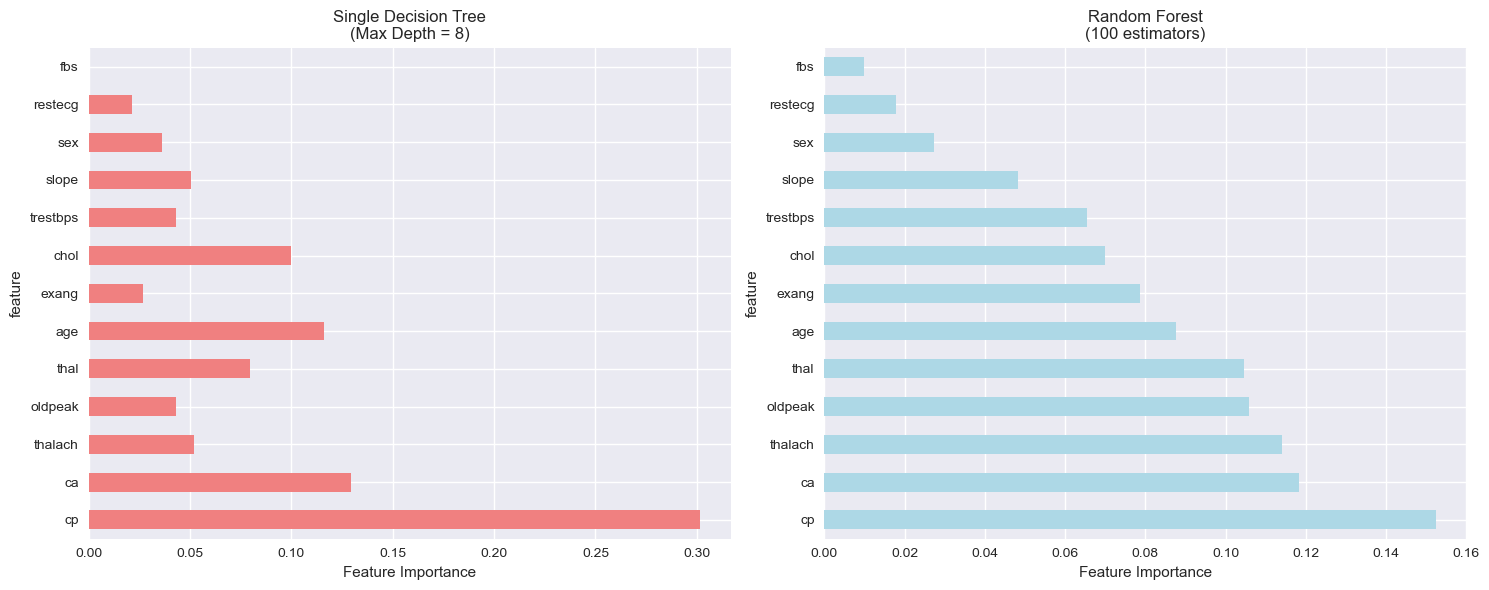

In [13]:
# Step 9: Compare Feature Importances between models

# Random Forest feature importances
rf_importance = pd.DataFrame({
    'feature': X.columns,
    'rf_importance': rf.feature_importances_
}).sort_values('rf_importance', ascending=False)

# Compare with single tree (depth=8)
dt_optimal = DecisionTreeClassifier(max_depth=8, random_state=42)
dt_optimal.fit(X_train, y_train)

comparison_df = pd.DataFrame({
    'feature': X.columns,
    'single_tree': dt_optimal.feature_importances_,
    'random_forest': rf.feature_importances_
}).sort_values('random_forest', ascending=False)

print("=== Feature Importance Comparison ===")
print(comparison_df.round(4))

# Visualize feature importances
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Single Tree
comparison_df.set_index('feature')['single_tree'].plot(kind='barh', ax=ax1, color='lightcoral')
ax1.set_title('Single Decision Tree\n(Max Depth = 8)')
ax1.set_xlabel('Feature Importance')

# Random Forest
comparison_df.set_index('feature')['random_forest'].plot(kind='barh', ax=ax2, color='lightblue')
ax2.set_title('Random Forest\n(100 estimators)')
ax2.set_xlabel('Feature Importance')

plt.tight_layout()
plt.show()

=== Cross-Validation Analysis ===

Decision Tree (depth=3):
  CV Scores: ['0.8293', '0.8293', '0.8232', '0.8537', '0.8110']
  Mean ± Std: 0.8293 ± 0.0139

Decision Tree (depth=8):
  CV Scores: ['0.9695', '0.9939', '0.9634', '0.9573', '0.9756']
  Mean ± Std: 0.9720 ± 0.0126

Decision Tree (unlimited):
  CV Scores: ['0.9878', '1.0000', '0.9756', '0.9634', '0.9756']
  Mean ± Std: 0.9805 ± 0.0124

Random Forest:
  CV Scores: ['0.9573', '0.9939', '0.9878', '0.9634', '0.9939']
  Mean ± Std: 0.9793 ± 0.0157


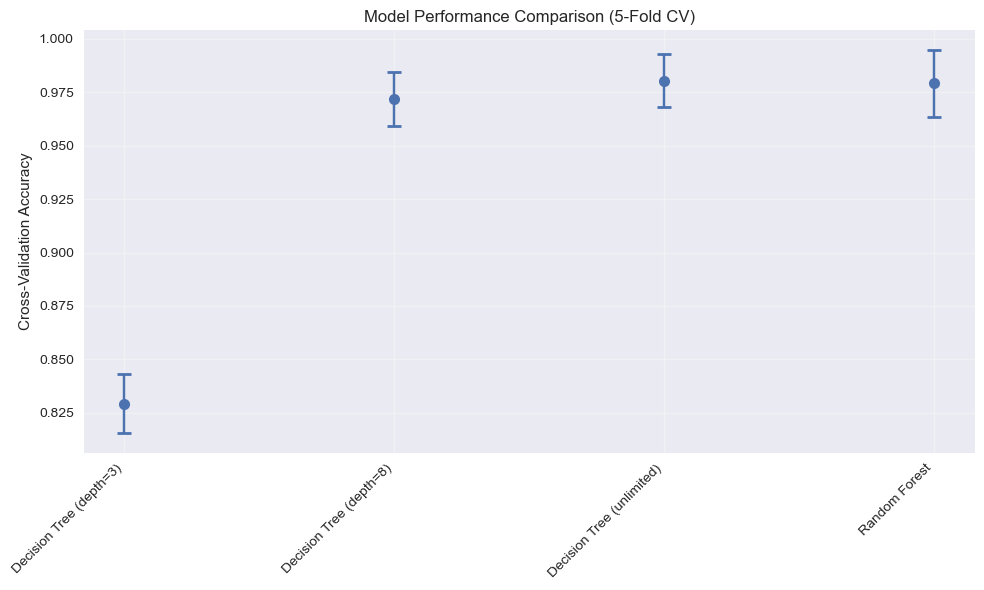

In [15]:
# Step 10: Cross-Validation Evaluation
from sklearn.model_selection import cross_val_score, StratifiedKFold

print("=== Cross-Validation Analysis ===")

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Models to evaluate
models = {
    'Decision Tree (depth=3)': DecisionTreeClassifier(max_depth=3, random_state=42),
    'Decision Tree (depth=8)': DecisionTreeClassifier(max_depth=8, random_state=42),
    'Decision Tree (unlimited)': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
}

results = {}

for name, model in models.items():
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    
    results[name] = {
        'mean': cv_scores.mean(),
        'std': cv_scores.std(),
        'scores': cv_scores
    }
    
    print(f"\n{name}:")
    print(f"  CV Scores: {[f'{score:.4f}' for score in cv_scores]}")
    print(f"  Mean ± Std: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Visualize CV results
plt.figure(figsize=(10, 6))
model_names = list(results.keys())
means = [results[name]['mean'] for name in model_names]
stds = [results[name]['std'] for name in model_names]

plt.errorbar(range(len(model_names)), means, yerr=stds, 
             fmt='o', capsize=5, capthick=2, markersize=8)
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Model Performance Comparison (5-Fold CV)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [16]:
# Step 11: Final Model Evaluation and Summary
print("=== FINAL MODEL EVALUATION ===")

# Train final models on full training set
final_dt = DecisionTreeClassifier(random_state=42)  # Unlimited depth
final_rf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

final_dt.fit(X_train, y_train)
final_rf.fit(X_train, y_train)

# Final test set predictions
dt_final_pred = final_dt.predict(X_test)
rf_final_pred = final_rf.predict(X_test)

# Detailed classification reports
print("1. Decision Tree (Unlimited Depth) - Test Set Results:")
print(f"   Accuracy: {accuracy_score(y_test, dt_final_pred):.4f}")
print(classification_report(y_test, dt_final_pred, target_names=['No Disease', 'Disease']))

print("\n" + "="*60)
print("2. Random Forest - Test Set Results:")
print(f"   Accuracy: {accuracy_score(y_test, rf_final_pred):.4f}")
print(classification_report(y_test, rf_final_pred, target_names=['No Disease', 'Disease']))

print("\n" + "="*60)
print("3. SUMMARY OF KEY LEARNINGS:")
print(f"   • Dataset: {df.shape[0]} samples, {df.shape[1]-1} features, well-balanced classes")
print(f"   • Best CV Performance: Decision Tree Unlimited ({results['Decision Tree (unlimited)']['mean']:.4f} ± {results['Decision Tree (unlimited)']['std']:.4f})")
print(f"   • Best Test Performance: Random Forest ({accuracy_score(y_test, rf_final_pred):.4f})")
print(f"   • Most Important Features: cp, ca, thalach, oldpeak, thal")
print(f"   • Key Insight: This dataset works exceptionally well with tree-based models!")

=== FINAL MODEL EVALUATION ===
1. Decision Tree (Unlimited Depth) - Test Set Results:
   Accuracy: 0.9854
              precision    recall  f1-score   support

  No Disease       0.97      1.00      0.99       100
     Disease       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


2. Random Forest - Test Set Results:
   Accuracy: 0.9902
              precision    recall  f1-score   support

  No Disease       1.00      0.98      0.99       100
     Disease       0.98      1.00      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


3. SUMMARY OF KEY LEARNINGS:
   • Dataset: 1025 samples, 13 features, well-balanced classes
   • Best CV Performance: Decision Tree Unlimited (0.9805 ± 0.0124)
   • Best Test Perfor